# Load general libraries

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib notebook

# Load data

In [3]:
# import data

# Train data
train = pd.read_csv('./plasticc_dataset/training_set.csv')
print("Training data set")
display(train.head())

# metadata
metadata_train = pd.read_csv("./plasticc_dataset/training_set_metadata.csv")
print("Metadata for training dataset")
display(metadata_train.head())

# merge data
merged_data = train.merge(metadata_train, on = "object_id")
print("merged data")
display(merged_data.head())

Training data set


,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


Metadata for training dataset


,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90


merged data


,object_id,mjd,passband,flux,flux_err,detected,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,59750.4229,2,-544.810303,3.622952,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92
1,615,59750.4306,1,-816.434326,5.553370,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92
2,615,59750.4383,3,-471.385529,3.801213,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92
3,615,59750.4450,4,-388.984985,11.395031,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92
4,615,59752.4070,2,-681.858887,4.041204,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92


# Plot one light curve

object ids:  [      615       713       730 ... 130762946 130772921 130779836]


<IPython.core.display.Javascript object>


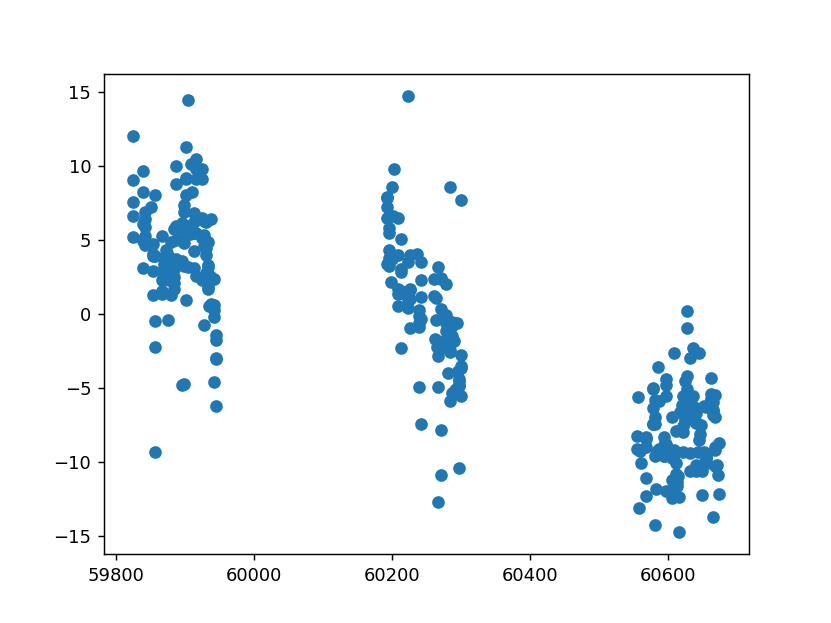

In [4]:
#print list of ids
print("object ids: ", merged_data.object_id.unique())

# get one light curve
one_ligth_curve = merged_data[merged_data["object_id"] == 713]

#display(one_ligth_curve)
#plot light curve
fix, ax = plt.subplots()
ax.scatter(one_ligth_curve["mjd"], one_ligth_curve["flux"])
# ax.set_title("target: ", one_ligth_curve["target"])

# Target analysis

There are 14 unique targets.


target
6      20830
15     64440
16    147474
42    212447
52     37480
53      4391
62     87079
64     13418
65    185894
67     39887
88     70622
90    465046
92     41985
95     30712
Name: object_id, dtype: int64

<IPython.core.display.Javascript object>


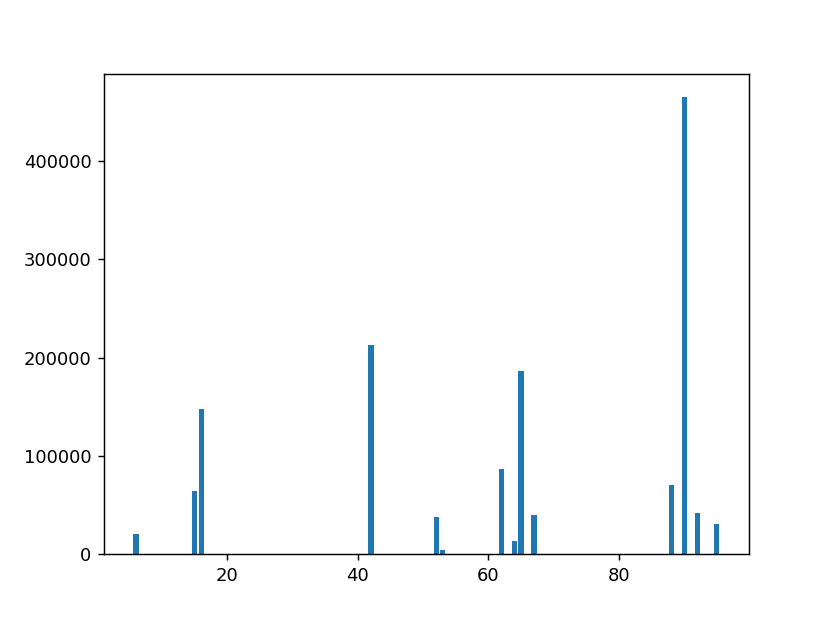

<BarContainer object of 14 artists>

In [14]:
unique_targets = merged_data.target.unique()

print("There are {} unique targets.".format(len(unique_targets)))

# histogram of targets
objects_per_target = merged_data.groupby("target", )["object_id"].count()
display(objects_per_target)
fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
plt.bar(objects_per_target.index, objects_per_target)
# ax.hist(objects_per_target.index, objects_per_target)

<IPython.core.display.Javascript object>


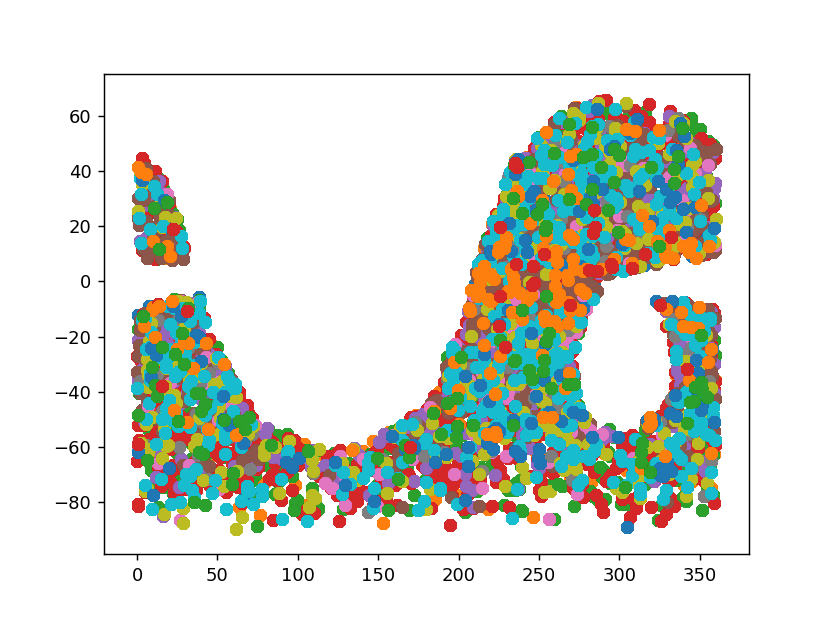

In [36]:
# How they distirbuite in space
fig = plt.figure()
ax = fig.add_subplot(111)

# iterate per target
for target in unique_targets:
        objects_by_target = merged_data[merged_data.target == target]
#         print(objects_by_target.shape)
        ax.scatter(objects_by_target.gal_l, objects_by_target.gal_b, alpha = .5)

# Time flux series

There is 7848 targets in training dataset
Object target:  2072
Object target:  16802


<IPython.core.display.Javascript object>


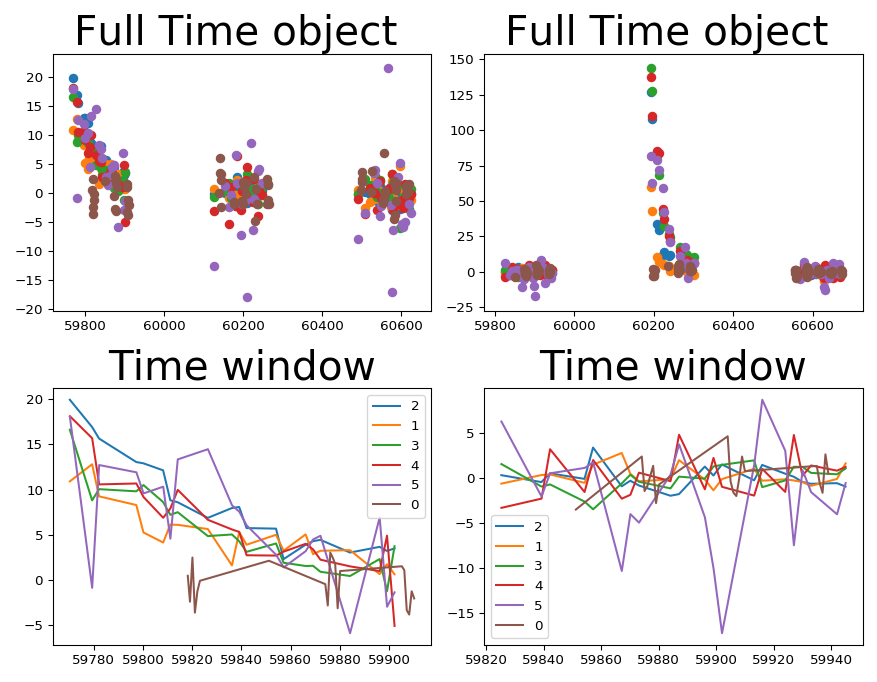

In [40]:
# exploring training

# get unique objects
unique_sources = merged_data.object_id.unique()
print(f'There is {unique_sources.shape[0]} targets in training dataset')

# number of objects
number_objects = 2

# array of objects
objects = []

# get obejct data
# for i in range(number_objects):
for i in [10, 99]:
    
    # get one object
    object_data = merged_data[merged_data.object_id == unique_sources[i]]
    # add object to array
    objects.append(object_data)
    print("Object target: ", unique_sources[i])

    
# display(object_data.head())

# Plot passband flux time series
fig, ax = plt.subplots(2, number_objects, figsize = (9,7), tight_layout = True)

# get passband of object
unique_passbands = merged_data.passband.unique()

# for each object
for index, object_ in enumerate(objects):
    
    # plot each passband
    for passband in unique_passbands:
        
        # filter by passband
        specific_passband = object_[(object_.passband == passband)]
        specific_passband_window = object_[(object_.passband == passband) & (object_.mjd < 60000)]
        # plot passband time serie
        
        # full time
        ax[0, index].scatter(specific_passband.mjd, specific_passband.flux, label = passband)
        ax[0, index].set_title("Full Time object ", fontsize = 30)
        
        # on a window of time
#         ax[1, index].scatter(specific_passband_window.mjd, specific_passband_window.flux, label = passband)
        ax[1, index].plot(specific_passband_window.mjd, specific_passband_window.flux, label = passband)
        ax[1, index].legend()
        ax[1, index].set_title("Time window", fontsize = 30)

# # add plot features
# fig.legend()
# fig.xlabel("MJD (in days from November 17, 1858)", fontsize = 15)
# fig.ylabel("Flux", fontsize = 15)